# Qunatum optimal control example 2

This is an example code for qunatum optimal of two control parameters. you can choose any Hamiltonian you want with two control parameters. 

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from qoct2ctrl import QH, QOCT

%matplotlib inline

Start with some initial conditions of Hamiltonian matrix and initial control parameters. We choose eigenstate of H0 as initial state phi_i and goal state phi_g respectively. 

In [3]:
U = 1.
eps_cos = 1.
eps_sin = 1.

H0 = [[0,U],[U,0]]
Hctr = [[eps_cos,0],[0,-eps_cos]]
Hctr2 = [[eps_sin,0],[0,-eps_sin]]
H = np.array(H0) + np.array(Hctr)

eig_val, eig_vec = np.linalg.eig(H)
phi_i = eig_vec[:,0].reshape(2,1)
phi_g = eig_vec[:,1].reshape(2,1)

N_time = 4000
ctrl = 1.*np.ones(N_time)
ctrl2 = 0.*np.ones(N_time)

Call QH module to build up equation of motion and states.

In [4]:
qh_test = QH(H0, Hctr, ctrl, Hctr2, ctrl2, phi_i)
time = qh_test.real_tim
"""
#Gauss pulse case
tau = time - time[len(time)/2]
A_guass = -.75*tau*np.exp(-tau**2/25.)
qh_test.ctrl = np.cos(A_guass)
qh_test.ctrl2 = np.sin(A_guass)

plt.plot(time[:], qh_test.ctrl,label = 'cos(A(t))')
plt.plot(time[:], qh_test.ctrl2, label = 'sin(A(t))')
plt.xlabel('Time')
plt.ylabel('Control')
plt.legend()
plt.show()
"""
phi = qh_test.phi_t()

Here we can show our first figure of probability variation in time.

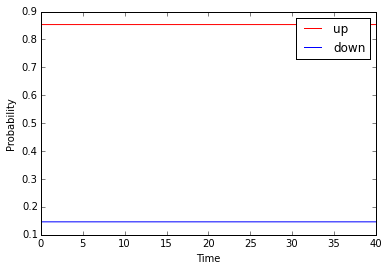

In [5]:
prob = qh_test.prob_t(phi)
plt.plot(time, prob[:,0,:],'r',label = 'up')
plt.plot(time, prob[:,1,:],'b',label = 'down')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

You can find the probability will stay at original state since I choose eigenstate to begin.

Given the goal state we want and previous qh_test class into QOCT module to calculate optimal control pulse.

IterTime: 1,   Error: [[ 1.]],   TotTime: 6.796225,   AvgTime: 6.796228
IterTime: 2,   Error: [[ 0.72757502]],   TotTime: 14.028747,   AvgTime: 7.0143755
IterTime: 3,   Error: [[ 0.54641452]],   TotTime: 20.803367,   AvgTime: 6.934457
IterTime: 4,   Error: [[ 0.32275429]],   TotTime: 28.02411,   AvgTime: 7.0060285
IterTime: 5,   Error: [[ 0.17362597]],   TotTime: 35.022856,   AvgTime: 7.004572
IterTime: 6,   Error: [[ 0.08963487]],   TotTime: 42.511507,   AvgTime: 7.08525183333
IterTime: 7,   Error: [[ 0.04560511]],   TotTime: 49.671993,   AvgTime: 7.09599957143
IterTime: 8,   Error: [[ 0.02315413]],   TotTime: 56.737134,   AvgTime: 7.09214225
IterTime: 9,   Error: [[ 0.01178663]],   TotTime: 65.199242,   AvgTime: 7.24436077778
IterTime: 10,   Error: [[ 0.00602271]],   TotTime: 74.630239,   AvgTime: 7.4630243
IterTime: 11,   Error: [[ 0.00308822]],   TotTime: 81.773571,   AvgTime: 7.43396136364
IterTime: 12,   Error: [[ 0.00158791]],   TotTime: 89.301214,   AvgTime: 7.44176816667
IterT

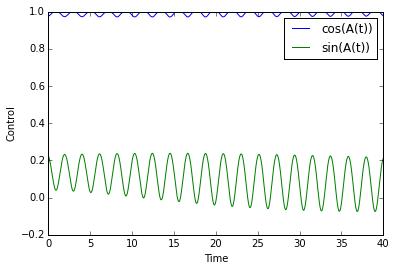

In [6]:
qh_test.ctrl = .9*np.ones(N_time)
qh_test.ctrl2 = .1*np.ones(N_time)
qoct_test = QOCT(qh_test, phi_g)
ctrl_test, ctrl2_test = qoct_test.run()
plt.plot(time[:-1], ctrl_test,label = 'cos(A(t))')
plt.plot(time[:-1], ctrl2_test, label = 'sin(A(t))')
plt.xlabel('Time')
plt.ylabel('Control')
plt.legend()
plt.show()

and probability variation in time.

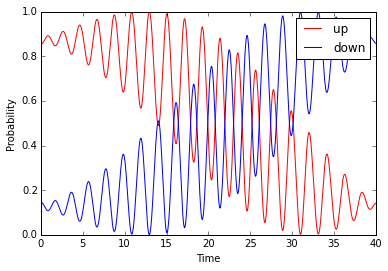

In [7]:
phi_new = qh_test.phi_t()
prob_new = qh_test.prob_t(phi_new)

plt.plot(time, prob_new[:,0,:],'r',label = 'up')
plt.plot(time, prob_new[:,1,:],'b', label = 'down')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

One can find a complete flip of probability after optimal control.

Following we consider a long time variation of probability and control comes in the middle time.

In [8]:
lon = np.size(ctrl_test)
ctrl_lon = np.ones(3*lon)
ctrl_lon[lon:2*lon ] = ctrl_test[:]
ctrl2_lon = np.zeros(3*lon)
ctrl2_lon[lon:2*lon ] = ctrl2_test[:]

One can plot the probability variation again.

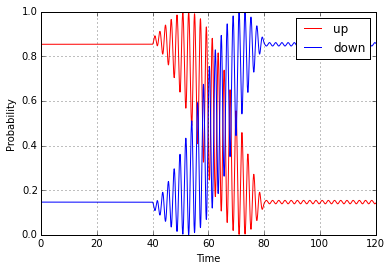

In [9]:
qh_test2 = QH(H0, Hctr, ctrl_lon, Hctr2, ctrl2_lon, phi_i)
time2 = qh_test2.real_tim
phi2 = qh_test2.phi_t()

prob2 = qh_test2.prob_t(phi2)
plt.plot(time2, prob2[:,0,:],'r',label = 'up')
plt.plot(time2, prob2[:,1,:],'b', label = 'down')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.grid()
plt.legend()
plt.show()

Check freq of prob2 after ctrl close

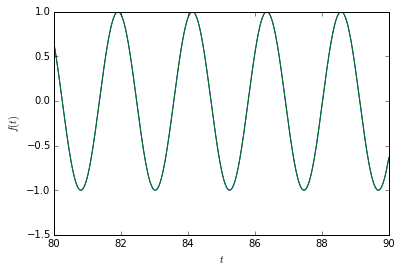

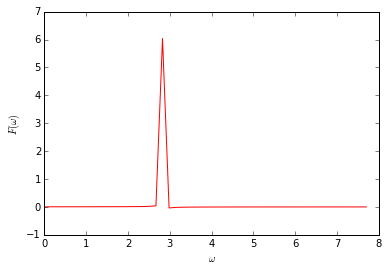

[array([ 2.98451302, -2.98451302])] [[-5.96902604]]


In [32]:
ti = time2[-lon:]
#pb = phi2[-lon:,1,:]
pb = prob2[-lon:,1,:].reshape(lon) 
pb = pb - sum(pb)/lon
pb = pb/max(pb)
pb2 = np.sin(2*1.414*ti+2.4)

nt = 1000
plt.plot(ti[:nt],pb[:nt])
plt.plot(ti[:nt],pb2[:nt])
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.show()


nf = 50
plt.plot(freq[:nf], (pbf.real[:nf]),'r')
plt.xlabel('$\omega$')
plt.ylabel('$F(\omega)$')
plt.show()


flocmin = [freq[i] for i in argrelextrema(pbf, np.less)]
       
print flocmin, (np.diff(flocmin))#/(len(flocmin)-1)

#plt.plot(np.fft.ifft(pbf)*2/dt)
#plt.show()

A flip happend but also with a small fluctuation after optimal control.(Why?) 

We can also plot eigen energy variation in time.

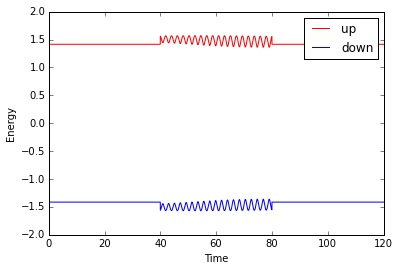

In [11]:
eigE2 = qh_test2.eigE_t()
plt.plot(time2[:-1], eigE2[:,0],'r',label = 'up')
plt.plot(time2[:-1], eigE2[:,1],'b', label = 'down')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()
plt.show()